# Board modes

With the [last firmware version](https://docs.openbci.com/docs/02Cyton/CytonSDK#firmware-v300-new-commands) of OpenBCI is possibble to define custom data in the `AUX` bytes, this fields can be used for define external triggers, there are 5 differents modes.

## Default/Accelerometer mode
Sends accelerometer data in `AUX` bytes

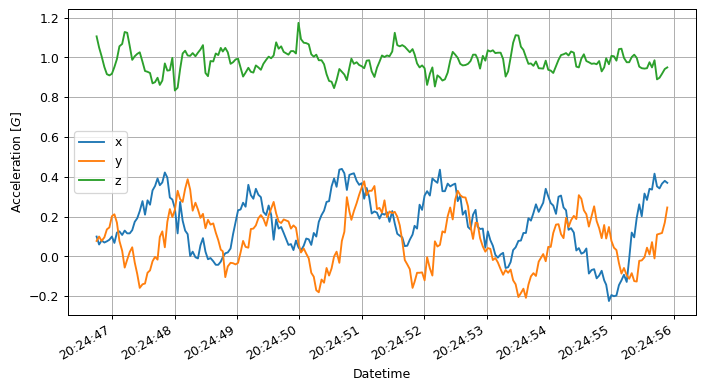

In [6]:
from openbci_stream.acquisition import Cyton
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np

openbci = Cyton('serial', capture_stream=True)
openbci.command(openbci.BOARD_MODE_DEFAULT)

openbci.stream(10)

time_axis = [datetime.fromtimestamp(_) for _ in openbci.timestamp_time_series]
aux = openbci.aux_time_series

time_axis = np.array(time_axis)[~np.all(aux == 0, axis=0)]
x, y, z = aux.T[~np.all(aux.T == 0, axis=1)].T


plt.figure(figsize=(9, 5), dpi=90)
plt.subplot(111)

plt.plot(time_axis, x, label='x')
plt.plot(time_axis, y, label='y')
plt.plot(time_axis, z, label='z')
plt.xlabel('Datetime')
plt.ylabel('Acceleration [$G$]')
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

## Debug mode
Sends serial output over the external serial port which is helpful for debugging.

In [7]:
from openbci_stream.acquisition import Cyton
from datetime import datetime
openbci = Cyton('serial', capture_stream=True)
openbci.command(openbci.BOARD_MODE_DEBUG)

openbci.stream(15)

aux = openbci.aux_time_series
print(aux)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Analog mode
Reads from analog pins `A5(D11)`, `A6(D12)` and if no wifi shield is present, then `A7(D13)` as well.

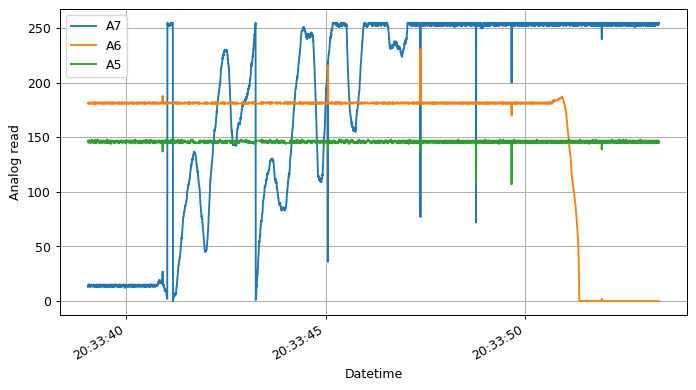

In [15]:
from openbci_stream.acquisition import Cyton
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np

openbci = Cyton('serial', capture_stream=True)
openbci.command(openbci.BOARD_MODE_ANALOG)
openbci.stream(15)

time_axis = [datetime.fromtimestamp(_) for _ in openbci.timestamp_time_series]
a7, a6, a5 = openbci.aux_time_series

plt.figure(figsize=(9, 5), dpi=90)
plt.subplot(111)

plt.plot(time_axis, a7, label='A7')
plt.plot(time_axis,a6, label='A6')
plt.plot(time_axis,a5, label='A5')
plt.xlabel('Datetime')
plt.ylabel('Analog read')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

## Digital mode
Reads from analog pins `D11`, `D12` and `D17`. If no wifi present then also `D13` and `D18`.

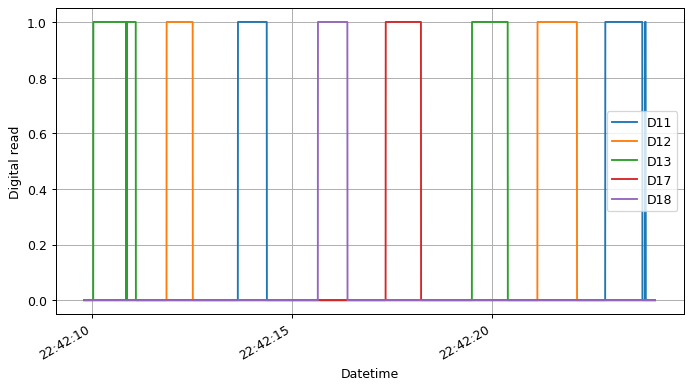

In [15]:
from openbci_stream.acquisition import Cyton
import time
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np

openbci = Cyton('serial', capture_stream=True, daisy=False)
openbci.command(openbci.BOARD_MODE_DIGITAL)
time.sleep(1)

openbci.stream(15)

time_axis = [datetime.fromtimestamp(_) for _ in openbci.timestamp_time_series]
d11, d12, d13, d17, d18 = openbci.aux_time_series

plt.figure(figsize=(9, 5), dpi=90)
plt.subplot(111)

plt.plot(time_axis, d11, label='D11')
plt.plot(time_axis, d12, label='D12')
plt.plot(time_axis, d13, label='D13')
plt.plot(time_axis, d17, label='D17')
plt.plot(time_axis, d18, label='D18')
plt.xlabel('Datetime')
plt.ylabel('Digital read')
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

## Marker mode
Turns accel off and injects markers into the stream by sending `'X` where `X` is any char to add to the first `AUX` byte.

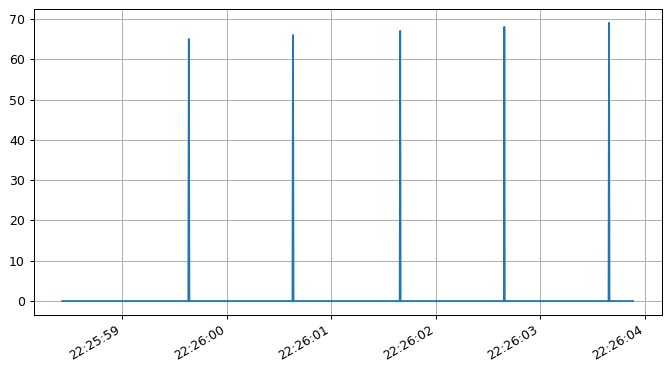

In [20]:
from openbci_stream.acquisition import Cyton
from datetime import datetime
import time
from matplotlib import pyplot as plt

openbci = Cyton('serial', capture_stream=True, daisy=False)
openbci.command(openbci.BOARD_MODE_MARKER)
time.sleep(1)  # some times this pause is needed for the correct command execution

openbci.start_stream()

for i in range(5):
    time.sleep(1)
    openbci.send_marker(65+i, 3)

time.sleep(1)
openbci.stop_stream(wait_for_no_data=True)

time_axis = [datetime.fromtimestamp(_) for _ in openbci.timestamp_time_series]
aux = openbci.aux_time_series

plt.figure(figsize=(9, 5), dpi=90)
plt.subplot(111)
plt.plot(time_axis, aux)
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

## Get current mode
At any time is possible to get the current `BOARD MODE` sending a request:

In [9]:
openbci.command(openbci.BOARD_MODE_GET)

b'Success: digital$$$'

You can also call `boardmode`:

In [23]:
openbci.boardmode

'digital'